## 手書き数字認識

このデータセットは、手書きの数字（0から9までの10種類）に関する画像データを収集したものです。各画像は8×8ピクセルのグレースケール画像であり、64個の特徴量（ピクセルの明るさ）から構成されています。

このデータセットは、機械学習のアルゴリズムを訓練して手書き数字の認識を行うために使用されます。各サンプルは、0から9のいずれかの数字を表しており、その数字は各画像のラベル（ターゲット）として提供されます。

データセットに含まれる主な情報は以下の通りです：

- 特徴量：各画像は8×8ピクセルで、合計64の特徴量（ピクセルの明るさ）があります。
- ターゲット：各画像が表す数字（0から9のいずれか）がラベルとして与えられます。

## 1. 基本統計量の算出

### GPT スクリプト : データのインポート
* from sklearn.datasets import load_digits を利用
* load_digits() でdigitsデータセットをロード
* 特徴量を含むデータフレームに変換する。ターゲット列をデータフレームに追加する
* データフレーム名はdfとする
* データフレームdfを表示する
* Pythonコード

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

# データセットをロード
digits_data = load_digits()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(digits_data.data, columns=digits_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = digits_data.target

# データフレームdfを表示する
df


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


各レコードを画像で表示

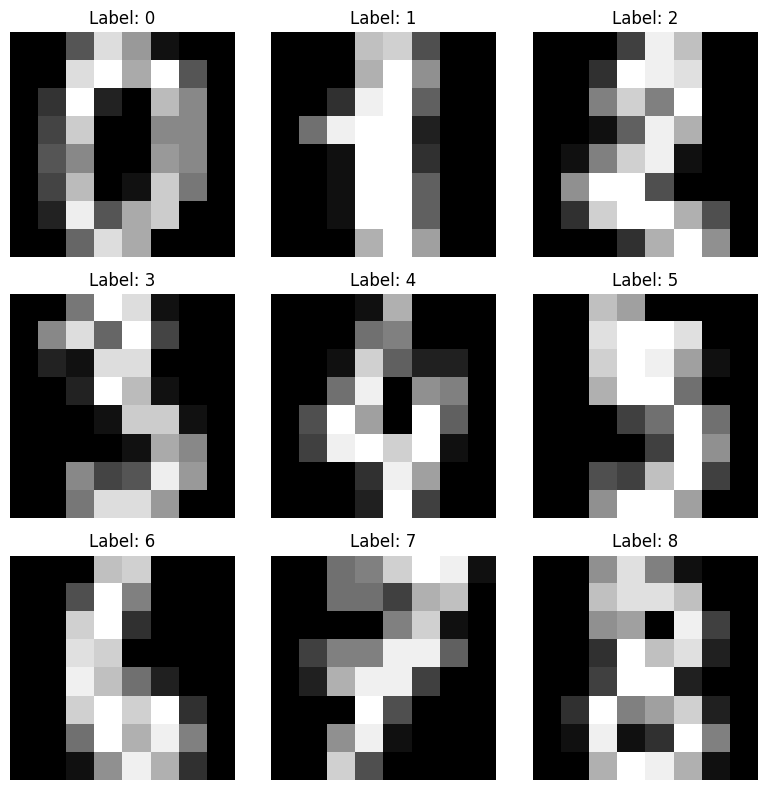

In [2]:
import matplotlib.pyplot as plt

# 最初の9つのサンプルを表示する
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits_data.images[i], cmap='gray')  # 注意: '_r' を追加して逆色表示にする
    ax.set_title(f"Label: {digits_data.target[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 6. Classification(教師有り学習)

* 決定木(Decision Tree)について

決定木（Decision Tree）は、機械学習やデータマイニングで広く使用されるモデルの一つです。分類（Classification）および回帰（Regression）の両方の問題に適用することができます。

決定木は、データセットの特徴（Feature）に基づいてデータを分割することによって、目標変数（Target Variable）を予測するモデルを構築します。データを分割する際には、各分割点で目標変数に対する最も情報が豊富な特徴を選択します。このプロセスは再帰的に行われ、分割が不要となる条件が満たされるまで続きます。

決定木は直感的で理解しやすいモデルであり、以下のような特長があります。

* 解釈性が高い： 決定木は分岐や葉ノードが視覚的に理解しやすいため、モデルの解釈が比較的容易です。これにより、モデルがどのように予測を行っているかを理解しやすくなります。

* 非線形な関係をモデル化できる： 決定木は特徴の線形性に依存せず、非線形な関係をモデル化することができます。そのため、特徴間の複雑な相互作用を捉えるのに有効です。

* 前処理の要件が少ない： 決定木は特徴のスケーリングやダミー変数化などの前処理が必要ありません。カテゴリカルな特徴も扱うことができます。

* 過学習のリスクがある： 決定木は過学習しやすい傾向があります。過度に深い木を作成すると、訓練データに対する適合度が高くなりますが、未知のデータに対する汎化性能が低下する可能性があります。過学習を防ぐために、木の深さを制限するなどの手法が使われます。

* アンサンブル法との組み合わせが有効： 決定木は単体では性能が低いことがありますが、複数の決定木を組み合わせたアンサンブル法（例：ランダムフォレスト、勾配ブースティング木）を使うことで性能を向上させることができます。

### GPT プロンプト

* データフレームdfを利用、目的変数はtarget列を利用
* 決定木を使い分類を行う
* 交差検証法(k=5)を使い、精度の検証を行う
* 混同行列を用いて結果を確かめる、
* 正解率、適合率、再現率、F1スコアを表示する
* 混同行列はヒートマップで表示する
* 決定木を可視化する
* pythonコード

Cross-Validation Accuracies: [0.76111111 0.70833333 0.79665738 0.83844011 0.7994429 ]
Confusion Matrix:
[[164   0   2   0   4   4   3   0   1   0]
 [  0 136  13   8   2   1   3   2   9   8]
 [  2   8 132   6   1   3   5   5  13   2]
 [  0   6   8 131   2   8   3   7   8  10]
 [  4  13   2   0 136   2   7   9   6   2]
 [  8   1   1   3   7 143   6   2   3   8]
 [  3   3   0   0   6   2 164   1   2   0]
 [  3   2   1   3  10   3   0 139  15   3]
 [  3   9   8   8   1   7   2   1 127   8]
 [  0   8   6   7   3   9   1   8   4 134]]
Accuracy: 0.7824151363383417
Precision: 0.7824940858667745
Recall: 0.7824151363383417
F1 Score: 0.7819110811304375


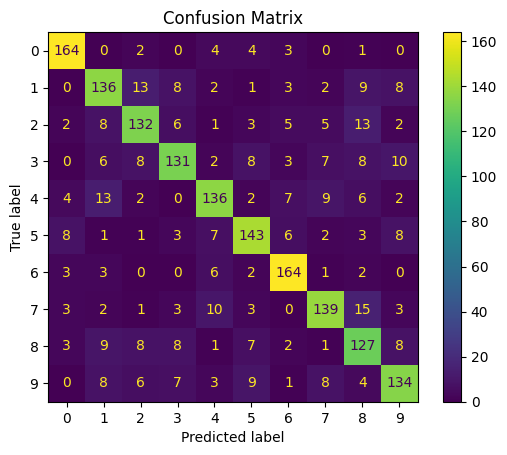

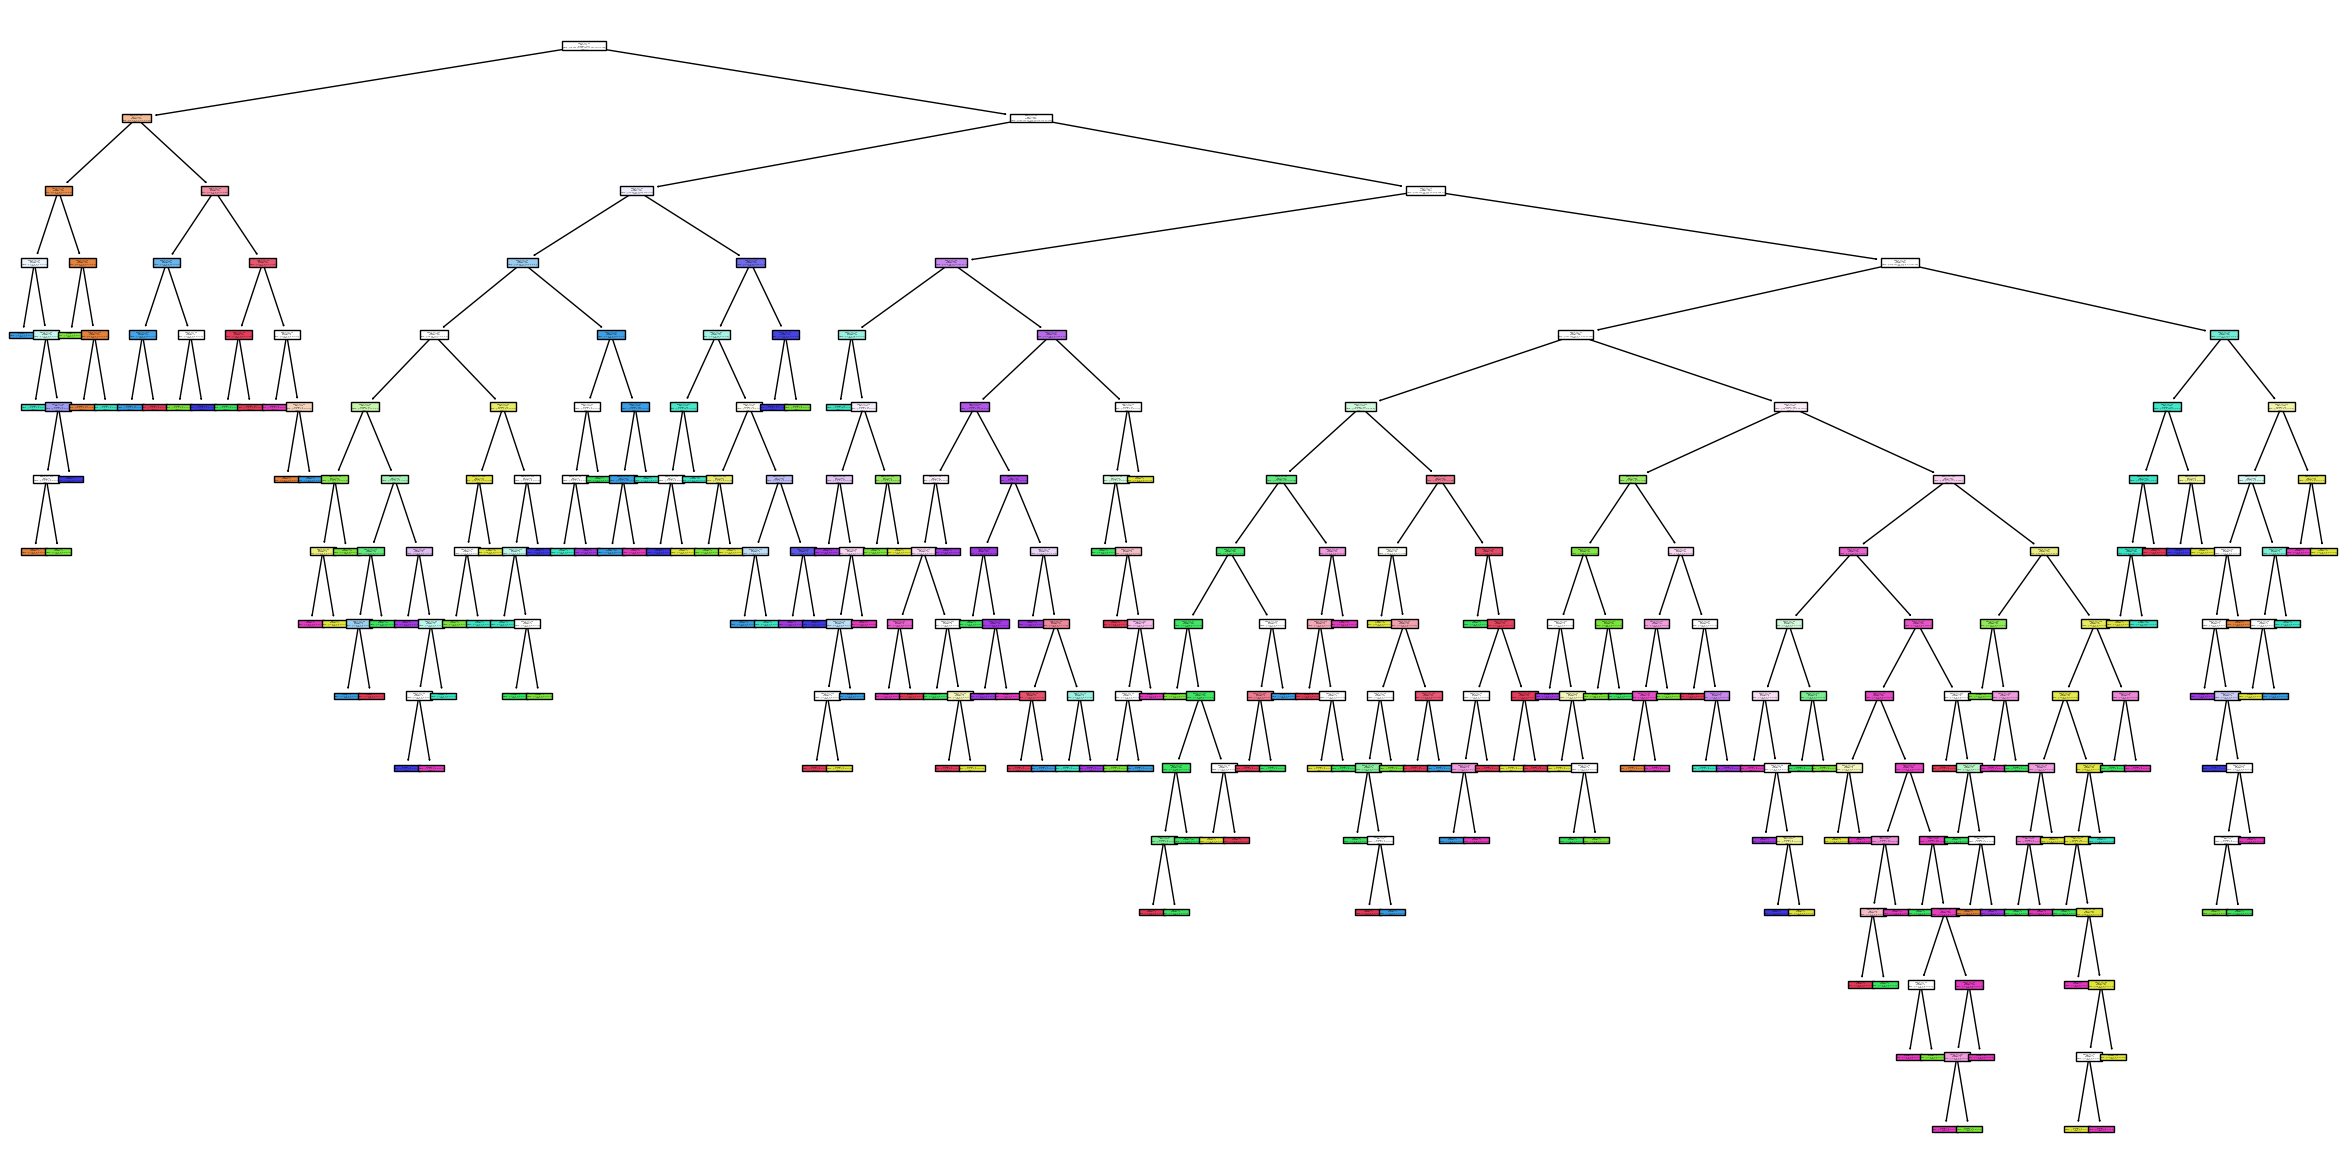

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

# データフレームから特徴量（説明変数）Xと目的変数（ターゲット）yを取得
X = df.drop('target', axis=1)  # 目的変数以外の列を特徴量として使用
y = df['target']  # 目的変数

# 決定木モデルの定義
tree_classifier = DecisionTreeClassifier()

# 交差検証法を使用してモデルの精度を評価
# cross_val_score関数を使用してk=5の交差検証を行い、精度を評価
accuracies = cross_val_score(tree_classifier, X, y, cv=5)

# 交差検証法の精度を出力
print("Cross-Validation Accuracies:", accuracies)

# 交差検証法を使用して予測を行う
predicted = cross_val_predict(tree_classifier, X, y, cv=5)

# 混同行列を作成して結果を確認
conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:")
print(conf_matrix)

# 正解率を計算して表示
accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

# 適合率を計算して表示
precision = precision_score(y, predicted, average='weighted')
print("Precision:", precision)

# 再現率を計算して表示
recall = recall_score(y, predicted, average='weighted')
print("Recall:", recall)

# F1スコアを計算して表示
f1 = f1_score(y, predicted, average='weighted')
print("F1 Score:", f1)

# 混同行列をヒートマップで表示
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# 決定木モデルを適合
tree_classifier.fit(X, y)

# 決定木を可視化
plt.figure(figsize=(30, 15))
tree.plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.show()

## 主成分分析を用いた精度向上

### GPT プロンプト : 主成分分析を利用した決定木の精度向上

* dfを利用
* PCAではtargetは利用しない
* PCAによって得られた射影行列を使用して、元のデータを主成分空間に射影する(累積寄与率が80％)
* 射影されたデータに対して決定木を実行(交差検証法利用, k=5)
* クラスタリング結果を'dt_pca'列に登録
* クラスタリング結果をPC1とPC2を使い散布図で表示(Target値で色分け、クラスタで形を変える)
* targetとクラスタリング結果を比較(targetとクラスタの表を作成)
* クラスタリング結果を元のデータフレームに追加し、CSVファイルとして保存(ファイル名：dt_pca_df.csv)
* 混同行列を用いて結果を確かめる、
* 正解率、適合率、再現率、F1スコアを表示する
* 混同行列はヒートマップで表示する

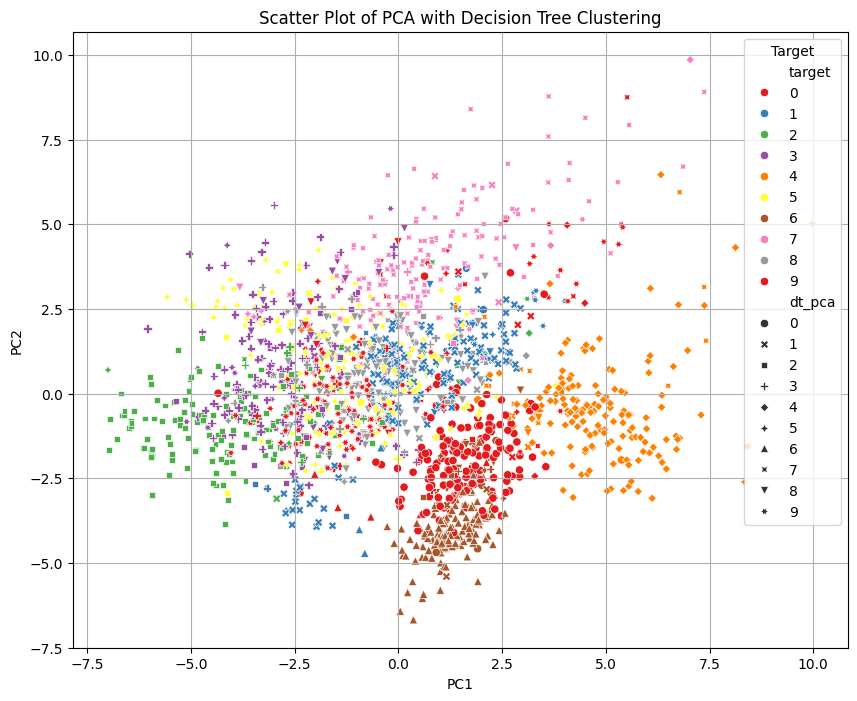

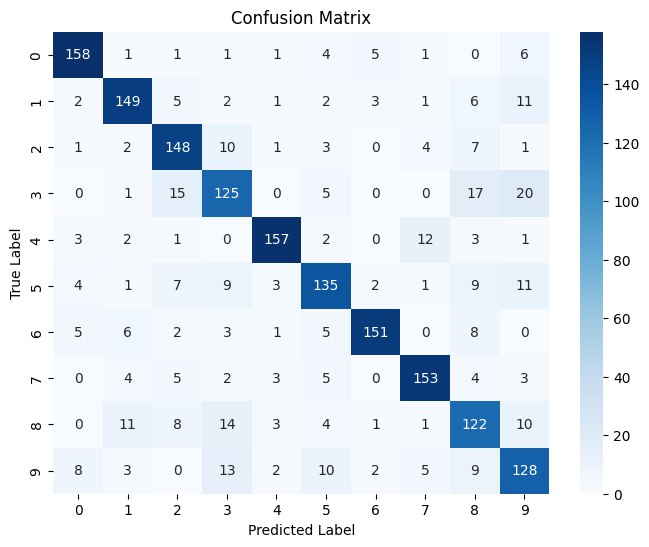

Accuracy: 0.7935447968836951
Precision: 0.7967550869098872
Recall: 0.7935447968836951
F1 Score: 0.7945762707182144


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))

# PCAを実行
pca = PCA(n_components=0.8)  # 累積寄与率80%でPCAを実行
X_pca = pca.fit_transform(X_scaled)  # PCAによる射影

# 決定木を実行
dt_classifier = DecisionTreeClassifier()
y_pred = cross_val_predict(dt_classifier, X_pca, df['target'], cv=5)  # 交差検証法による予測

# クラスタリング結果をデータフレームに追加
df['dt_pca'] = y_pred

# クラスタリング結果の可視化
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], style=df['dt_pca'], palette='Set1')
plt.title('Scatter Plot of PCA with Decision Tree Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Target')
plt.grid()
plt.show()

# 混同行列を作成
conf_matrix = confusion_matrix(df['target'], df['dt_pca'])

# 混同行列を表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 正解率
accuracy = accuracy_score(df['target'], df['dt_pca'])
print("Accuracy:", accuracy)

# 適合率
precision = precision_score(df['target'], df['dt_pca'], average='weighted')
print("Precision:", precision)

# 再現率
recall = recall_score(df['target'], df['dt_pca'], average='weighted')
print("Recall:", recall)

# F1スコア
f1 = f1_score(df['target'], df['dt_pca'], average='weighted')
print("F1 Score:", f1)

# クラスタリング結果を元のデータフレームに追加して保存
df.to_csv('dt_pca_df.csv', index=False)
